# 梯度下降
梯度下降是理解梯度下降算法的关键

预处理 preconditioning 是梯度下降中的一种常用技术，还被沿用到更高级的算法中。



In [16]:
# f(x+ε)= f(x)+ εf'(x) + O(ε**2)
# 在一阶近似中，f(x+ε)可以通过在x处的函数值和一阶导数得出，
# 假设在负梯度方向上移动的ε会减少f

%matplotlib inline
import numpy as np
import torch as t 
from pltutils import *

def f(x):
    return  x**2
def f_grad(x):
    return 2*x

# perform ： f(x - eta f'(x)) = f(x) - eta f'^2(x) + O(eta^2f'^2(x))
# if we use x = x - eta*f'(x), then the value of f(x) might be smaller
def gd(eta,f_grad,ep=10):
    x= 10.
    results = [x]
    for i in range(ep):
        x-=eta*f_grad(x)
        results.append(x)
    print(f"epoch {ep}, x:{x:f}")
    return results

results = gd(0.2,f_grad,50)


epoch 50, x:0.000000


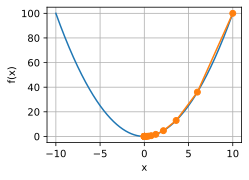

In [17]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    set_figsize()
    plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])


show_trace(results, f)


epoch 10, x:3.486784


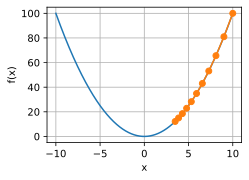

In [18]:
show_trace(gd(0.05, f_grad), f)


epoch 10, x:61.917364


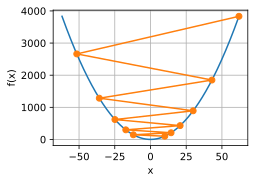

In [19]:
show_trace(gd(1.1, f_grad), f)


# 较差的学习率会导致停留在局部最小值


epoch 10, x:-1.528166


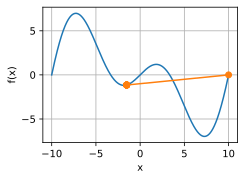

In [15]:
c = t.tensor(0.15 * np.pi)


def f(x):  # 目标函数
    return x * t.cos(c * x)


def f_grad(x):  # 目标函数的梯度
    return t.cos(c * x) - c * x * t.sin(c * x)


show_trace(gd(2, f_grad,10), f)


# 多元梯度下降
考虑x=[x1,x2,x....,xd].T的情况，梯度也是多元的,对于多变量函数，可以使用相应的泰勒近似来思考。

In [ ]:
def train_2d(trainer, steps=20, f_grad=None):  # @save
    """用定制的训练机优化2D目标函数"""
    # s1和s2是稍后将使用的内部状态变量
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results


def show_trace_2d(f, results):  # @save
    """显示优化过程中2D变量的轨迹"""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
